## Importing Required Library

In [2]:
!pip install openpyxl

## Uploading the Data Set

In [3]:
import pandas as pd
data=pd.read_excel("/content/EV Adoption Questionnaire.xlsx")
data.head()

,Name,City,What factors influence your decision to adopt an electric vehicle (EV),How important is the availability of charging stations to your decision to purchase an EV?,What do you perceive as the biggest barrier to adopting an electric vehicle?,How likely are you to switch to an electric vehicle in the next 3-5 years?,Do you think that government policies such as tax incentives or rebates would influence your decision to buy an electric vehicle?
0,John Paul,Hyderabad,"Low operating costs, environmental benefits",Critical for day-to-day usability,Lack of diverse models in the market,"Likely, if new models cater to preferences","Certainly, it would provide significant encour..."
1,Kiran Kumar,Kolkata,"Rising cost of petrol, air pollution concerns",Very important for practical usability,High battery replacement costs,"Likely, with technological advancements","Yes, it would be a major factor."
2,Maria Joseph,Mumbai,"Quiet operation, government subsidies","Moderately important, not a dealbreaker",Long charging time,"Very likely, if charging speeds improve","Yes, it would encourage adoption."
3,Rohan Patil,Nagpur,"Reduced noise pollution, modern features",Very important for long-distance travel,Limited availability of charging stations in s...,"Likely, if there are better financing options","Definitely, it would ease the financial burden."
4,Sunil Jacob,Kochi,"Environmental impact, rising fuel costs","Critical, especially for long-distance commutes","Limited range, high battery costs","Likely, with better incentives","Yes, they would make the transition easier."


# EDA

In [4]:
# Analyze 'City'
print("\nDistribution of 'City':")
print(data['City'].value_counts())


Distribution of 'City':
City
Kochi                 38
Delhi                 16
Jaipur                15
Mumbai                14
Pune                  13
Chennai               12
Hyderabad             11
Bangalore             10
Ahmedabad              9
Kolkata                8
Lucknow                8
Chandigarh             7
Patna                  5
Bengaluru              5
Mangalore              4
Noida                  4
Surat                  4
Thiruvananthapuram     4
Gurgaon                3
Vizag                  2
Indore                 2
Ludhiana               2
Bhopal                 2
Nashik                 2
Nagpur                 2
Visakhapatnam          1
Panjim                 1
Varanasi               1
Guwahati               1
Ranchi                 1
Vadodara               1
Amritsar               1
Mysuru                 1
Kanpur                 1
Goa                    1
Panaji                 1
Thane                  1
Coimbatore             1
Name: count, dtype: 

<ipython-input-5-e408dc95b26a>:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(y='City', data=data, palette='viridis')


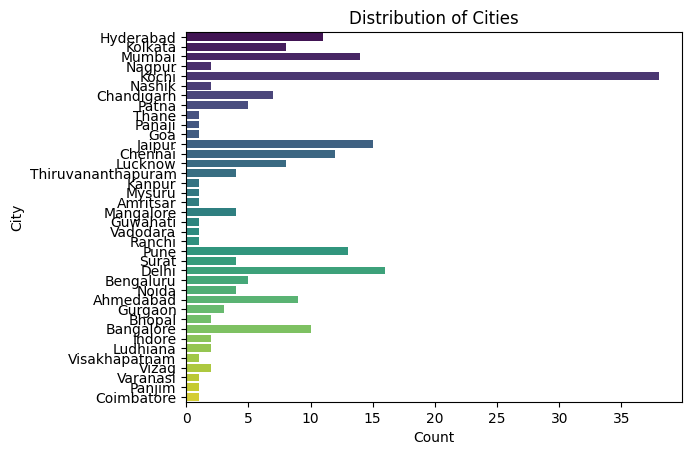

In [5]:
# Import the seaborn library using the conventional alias 'sns'
import seaborn as sns
import matplotlib.pyplot as plt # Make sure to import matplotlib.pyplot

# Visualize categorical distributions
sns.countplot(y='City', data=data, palette='viridis')
plt.title("Distribution of Cities")
plt.xlabel("Count")
plt.ylabel("City")
plt.show()

In [6]:
# Select the last 5 columns of the DataFrame
data= data.iloc[:, -5:]

data.head()


,What factors influence your decision to adopt an electric vehicle (EV),How important is the availability of charging stations to your decision to purchase an EV?,What do you perceive as the biggest barrier to adopting an electric vehicle?,How likely are you to switch to an electric vehicle in the next 3-5 years?,Do you think that government policies such as tax incentives or rebates would influence your decision to buy an electric vehicle?
0,"Low operating costs, environmental benefits",Critical for day-to-day usability,Lack of diverse models in the market,"Likely, if new models cater to preferences","Certainly, it would provide significant encour..."
1,"Rising cost of petrol, air pollution concerns",Very important for practical usability,High battery replacement costs,"Likely, with technological advancements","Yes, it would be a major factor."
2,"Quiet operation, government subsidies","Moderately important, not a dealbreaker",Long charging time,"Very likely, if charging speeds improve","Yes, it would encourage adoption."
3,"Reduced noise pollution, modern features",Very important for long-distance travel,Limited availability of charging stations in s...,"Likely, if there are better financing options","Definitely, it would ease the financial burden."
4,"Environmental impact, rising fuel costs","Critical, especially for long-distance commutes","Limited range, high battery costs","Likely, with better incentives","Yes, they would make the transition easier."


# Preprocessing

## Converting each column into a document, Hence we will have 5 documents for Topic modelling

In [7]:
# Convert each column into one document
documents = {}

for column in data.columns:  # Loop through each column in the dataset
    documents[column] = ' '.join(data[column].astype(str))  # Concatenate all rows in the column into a single string

# Display the documents
for question, document in documents.items():
    print(f"Document for question: {question}")
    print(f"Content: {document[:500]}...")  # Display the first 500 characters of the document
    print("\n")

Document for question: What factors influence your decision to adopt an electric vehicle (EV)
Content: Low operating costs, environmental benefits Rising cost of petrol, air pollution concerns Quiet operation, government subsidies Reduced noise pollution, modern features Environmental impact, rising fuel costs Cleaner air, savings on fuel Government subsidies, reducing carbon footprint Rising fuel prices, reduced pollution levels Convenience of home charging, eco-friendliness Government rebates, innovative features Reduced maintenance costs, innovative design options Cleaner energy sources, reduc...


Document for question: How important is the availability of charging stations to your decision to purchase an EV?
Content: Critical for day-to-day usability Very important for practical usability Moderately important, not a dealbreaker Very important for long-distance travel Critical, especially for long-distance commutes Very important for convenience Critical for day-to-day travel Extre

## Converting text from upper case to lower case

In [9]:
# Convert all text in each document to lowercase
for question, document in documents.items():
    documents[question] = document.lower()  # Convert to lowercase

# Display the updated documents
for question, document in documents.items():
    print(f"Document for question: {question}")
    print(f"Content (lowercased): {document[:500]}...")  # Display the first 500 characters
    print("\n")

Document for question: What factors influence your decision to adopt an electric vehicle (EV)
Content (lowercased): low operating costs, environmental benefits rising cost of petrol, air pollution concerns quiet operation, government subsidies reduced noise pollution, modern features environmental impact, rising fuel costs cleaner air, savings on fuel government subsidies, reducing carbon footprint rising fuel prices, reduced pollution levels convenience of home charging, eco-friendliness government rebates, innovative features reduced maintenance costs, innovative design options cleaner energy sources, reduc...


Document for question: How important is the availability of charging stations to your decision to purchase an EV?
Content (lowercased): critical for day-to-day usability very important for practical usability moderately important, not a dealbreaker very important for long-distance travel critical, especially for long-distance commutes very important for convenience critical f

## No of charecters of each document

In [10]:
# Find the length of each document
document_lengths = {question: len(document) for question, document in documents.items()}

# Display the length of each document
for question, length in document_lengths.items():
    print(f"Document for question: {question}")
    print(f"Length: {length} characters")
    print("\n")

Document for question: What factors influence your decision to adopt an electric vehicle (EV)
Length: 15774 characters


Document for question: How important is the availability of charging stations to your decision to purchase an EV?
Length: 16373 characters


Document for question: What do you perceive as the biggest barrier to adopting an electric vehicle?
Length: 14617 characters


Document for question: How likely are you to switch to an electric vehicle in the next 3-5 years?
Length: 15165 characters


Document for question: Do you think that government policies such as tax incentives or rebates would influence your decision to buy an electric vehicle?
Length: 15324 characters




## Performing RegEx Tokenization

In [11]:
import re

# Function for regex tokenization
def tokenize(text):
    # Tokenize by splitting on non-alphanumeric characters
    return re.findall(r'\b\w+\b', text)

# Tokenize each document
tokenized_documents = {question: tokenize(document) for question, document in documents.items()}

# Display the tokenized documents
for question, tokens in tokenized_documents.items():
    print(f"Tokens for question: {question}")
    print(f"Sample tokens: {tokens[:20]}")  # Display the first 20 tokens
    print("\n")

Tokens for question: What factors influence your decision to adopt an electric vehicle (EV)
Sample tokens: ['low', 'operating', 'costs', 'environmental', 'benefits', 'rising', 'cost', 'of', 'petrol', 'air', 'pollution', 'concerns', 'quiet', 'operation', 'government', 'subsidies', 'reduced', 'noise', 'pollution', 'modern']


Tokens for question: How important is the availability of charging stations to your decision to purchase an EV?
Sample tokens: ['critical', 'for', 'day', 'to', 'day', 'usability', 'very', 'important', 'for', 'practical', 'usability', 'moderately', 'important', 'not', 'a', 'dealbreaker', 'very', 'important', 'for', 'long']


Tokens for question: What do you perceive as the biggest barrier to adopting an electric vehicle?
Sample tokens: ['lack', 'of', 'diverse', 'models', 'in', 'the', 'market', 'high', 'battery', 'replacement', 'costs', 'long', 'charging', 'time', 'limited', 'availability', 'of', 'charging', 'stations', 'in']


Tokens for question: How likely are you 

## Importing NLTK for stop word removal

In [12]:
!pip install nltk

# Removal of stop words

In [13]:
import nltk
from nltk.corpus import stopwords

# Download the stopwords if not already downloaded
nltk.download('stopwords')

# Get the list of stop words
stop_words = set(stopwords.words('english'))

# Function to remove stop words from a list of tokens
def remove_stop_words(tokens):
    return [token for token in tokens if token not in stop_words]

# Remove stop words from each tokenized document
cleaned_documents = {question: remove_stop_words(tokens) for question, tokens in tokenized_documents.items()}

# Display the cleaned documents
for question, tokens in cleaned_documents.items():
    print(f"Cleaned tokens for question: {question}")
    print(f"Sample tokens: {tokens[:20]}")  # Display the first 20 tokens
    print("\n")

Cleaned tokens for question: What factors influence your decision to adopt an electric vehicle (EV)
Sample tokens: ['low', 'operating', 'costs', 'environmental', 'benefits', 'rising', 'cost', 'petrol', 'air', 'pollution', 'concerns', 'quiet', 'operation', 'government', 'subsidies', 'reduced', 'noise', 'pollution', 'modern', 'features']


Cleaned tokens for question: How important is the availability of charging stations to your decision to purchase an EV?
Sample tokens: ['critical', 'day', 'day', 'usability', 'important', 'practical', 'usability', 'moderately', 'important', 'dealbreaker', 'important', 'long', 'distance', 'travel', 'critical', 'especially', 'long', 'distance', 'commutes', 'important']


Cleaned tokens for question: What do you perceive as the biggest barrier to adopting an electric vehicle?
Sample tokens: ['lack', 'diverse', 'models', 'market', 'high', 'battery', 'replacement', 'costs', 'long', 'charging', 'time', 'limited', 'availability', 'charging', 'stations', 'smal

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


## Removing words having charecter length of less than 4

In [14]:
import nltk
import re
from nltk.corpus import stopwords

# Download the stopwords if not already downloaded
nltk.download('stopwords')

# Get the list of stop words
stop_words = set(stopwords.words('english'))

# Function to clean and filter tokens
def clean_tokens(tokens):
    # Remove stop words, words less than 4 characters, and non-alphanumeric words
    return [token for token in tokens if token not in stop_words and len(token) > 4 and re.match(r'^[a-zA-Z]+$', token)]

# Remove irrelevant words and keep words with length > 3 from each tokenized document
filtered_documents = {question: clean_tokens(tokens) for question, tokens in cleaned_documents.items()}

# Display the filtered documents
for question, tokens in filtered_documents.items():
    print(f"Filtered tokens for question: {question}")
    print(f"Sample tokens: {tokens[:20]}")  # Display the first 20 tokens
    print("\n")

Filtered tokens for question: What factors influence your decision to adopt an electric vehicle (EV)
Sample tokens: ['operating', 'costs', 'environmental', 'benefits', 'rising', 'petrol', 'pollution', 'concerns', 'quiet', 'operation', 'government', 'subsidies', 'reduced', 'noise', 'pollution', 'modern', 'features', 'environmental', 'impact', 'rising']


Filtered tokens for question: How important is the availability of charging stations to your decision to purchase an EV?
Sample tokens: ['critical', 'usability', 'important', 'practical', 'usability', 'moderately', 'important', 'dealbreaker', 'important', 'distance', 'travel', 'critical', 'especially', 'distance', 'commutes', 'important', 'convenience', 'critical', 'travel', 'extremely']


Filtered tokens for question: What do you perceive as the biggest barrier to adopting an electric vehicle?
Sample tokens: ['diverse', 'models', 'market', 'battery', 'replacement', 'costs', 'charging', 'limited', 'availability', 'charging', 'stations',

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


## Performing Lemmatization

In [15]:
import nltk
from nltk.stem import WordNetLemmatizer

# Download the WordNet resource if not already downloaded
nltk.download('wordnet')

# Initialize the WordNetLemmatizer
lemmatizer = WordNetLemmatizer()

# Function for lemmatizing a list of tokens
def lemmatize_tokens(tokens):
    return [lemmatizer.lemmatize(token) for token in tokens]

# Lemmatize the tokens in each document
lemmatized_documents = {question: lemmatize_tokens(tokens) for question, tokens in filtered_documents.items()}

# Display the lemmatized documents
for question, tokens in lemmatized_documents.items():
    print(f"Lemmatized tokens for question: {question}")
    print(f"Sample tokens: {tokens[:20]}")  # Display the first 20 tokens
    print("\n")


[nltk_data] Downloading package wordnet to /root/nltk_data...


Lemmatized tokens for question: What factors influence your decision to adopt an electric vehicle (EV)
Sample tokens: ['operating', 'cost', 'environmental', 'benefit', 'rising', 'petrol', 'pollution', 'concern', 'quiet', 'operation', 'government', 'subsidy', 'reduced', 'noise', 'pollution', 'modern', 'feature', 'environmental', 'impact', 'rising']


Lemmatized tokens for question: How important is the availability of charging stations to your decision to purchase an EV?
Sample tokens: ['critical', 'usability', 'important', 'practical', 'usability', 'moderately', 'important', 'dealbreaker', 'important', 'distance', 'travel', 'critical', 'especially', 'distance', 'commute', 'important', 'convenience', 'critical', 'travel', 'extremely']


Lemmatized tokens for question: What do you perceive as the biggest barrier to adopting an electric vehicle?
Sample tokens: ['diverse', 'model', 'market', 'battery', 'replacement', 'cost', 'charging', 'limited', 'availability', 'charging', 'station', 'sm

## Frequency of top 20 words in each of the document

In [16]:
from collections import Counter

# Function to get the top N words from a document
def get_top_n_words(tokens, n=20):
    counter = Counter(tokens)
    return counter.most_common(n)

# Find the top 20 words for each document
top_20_words_documents = {question: get_top_n_words(tokens, 20) for question, tokens in filtered_documents.items()}

# Display the top 20 words for each document
for question, top_words in top_20_words_documents.items():
    print(f"Top 20 words for question: {question}")
    print(top_words)  # List of tuples (word, frequency)
    print("\n")

Top 20 words for question: What factors influence your decision to adopt an electric vehicle (EV)
[('costs', 74), ('environmental', 69), ('savings', 50), ('maintenance', 38), ('lower', 38), ('government', 31), ('impact', 31), ('concerns', 23), ('reduced', 23), ('benefits', 22), ('pollution', 17), ('reducing', 17), ('carbon', 17), ('availability', 16), ('incentives', 15), ('growing', 14), ('models', 14), ('footprint', 13), ('battery', 13), ('charging', 12)]


Top 20 words for question: How important is the availability of charging stations to your decision to purchase an EV?
[('important', 175), ('charging', 111), ('stations', 67), ('would', 41), ('extremely', 40), ('infrastructure', 30), ('without', 25), ('essential', 21), ('network', 20), ('critical', 19), ('chargers', 19), ('especially', 18), ('reliable', 18), ('access', 17), ('travel', 16), ('charge', 13), ('areas', 12), ('options', 12), ('daily', 11), ('since', 10)]


Top 20 words for question: What do you perceive as the biggest b

## Importing word cloud library

In [17]:
!pip install wordcloud

## Word cloud for document 1

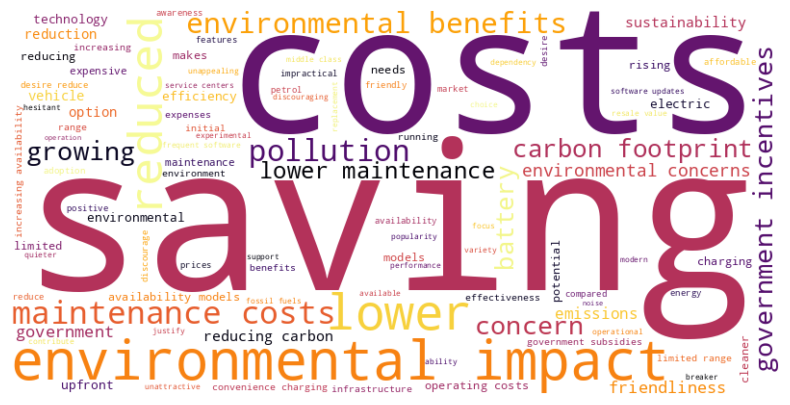

In [18]:
from wordcloud import WordCloud
import matplotlib.pyplot as plt

# Preprocess tokens by removing unwanted words
filtered_tokens = [word for word in filtered_documents['What factors influence your decision to adopt an electric vehicle (EV)']
                   if word.lower() not in {'bengaluru traffic', 'traffic', 'bengaluru',
                                           'better', 'could', 'commuters', 'especially', 'modes',
                                           'often', 'metro'}]

# Generate the word cloud
wordcloud = WordCloud(width=800, height=400, background_color='white',
                      max_words=100, colormap='inferno').generate(' '.join(filtered_tokens))

# Display the word cloud
plt.figure(figsize=(10, 5))
plt.imshow(wordcloud, interpolation='bilinear') # Changed interpolation to a valid value like 'bilinear'
plt.axis('off')  # Hide axes
plt.show()

## Word cloud for document 2

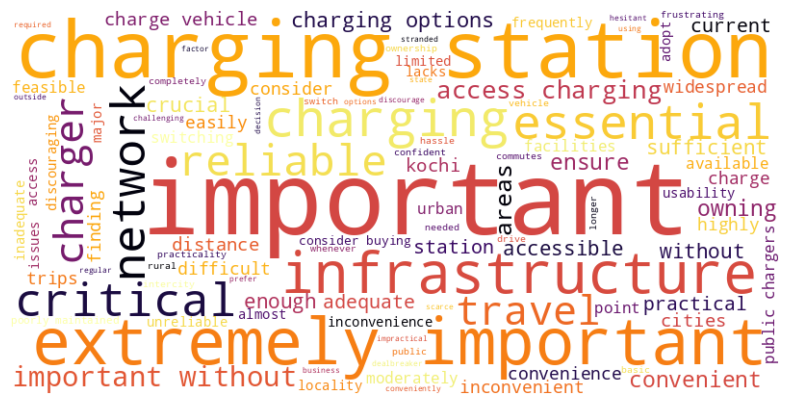

In [19]:


# Preprocess tokens by removing unwanted words
filtered_tokens = [word for word in filtered_documents['How important is the availability of charging stations to your decision to purchase an EV?']
                   if word.lower() not in {'commute', 'makes', 'takes', 'feels', 'commuting',
                                           'better', 'could', 'commuters', 'especially', 'modes',
                                           'often', 'hours', 'daily','still','minute','spending','spend','traffic','every','personal'}]

# Generate the word cloud
wordcloud = WordCloud(width=800, height=400, background_color='white',
                      max_words=100, colormap='inferno').generate(' '.join(filtered_tokens))

# Display the word cloud
plt.figure(figsize=(10, 5))
plt.imshow(wordcloud, interpolation='bilinear')  # Valid interpolation method
plt.axis('off')  # Hide axes
plt.show()


## Word cloud for document 3

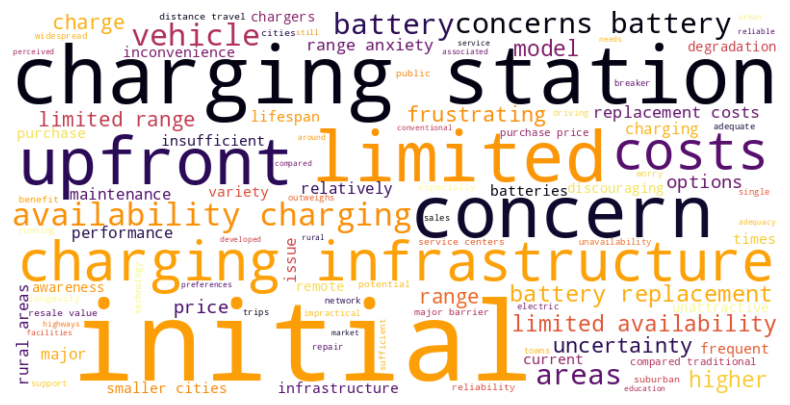

In [20]:


# Preprocess tokens by removing unwanted words
filtered_tokens = [word for word in filtered_documents['What do you perceive as the biggest barrier to adopting an electric vehicle?']
                   if word.lower() not in {'commute', 'makes', 'takes', 'feels'}]

# Generate the word cloud
wordcloud = WordCloud(width=800, height=400, background_color='white',
                      max_words=100, colormap='inferno').generate(' '.join(filtered_tokens))

# Display the word cloud
plt.figure(figsize=(10, 5))
plt.imshow(wordcloud, interpolation='bilinear')  # Valid interpolation method
plt.axis('off')  # Hide axes
plt.show()


## Word cloud for document 4

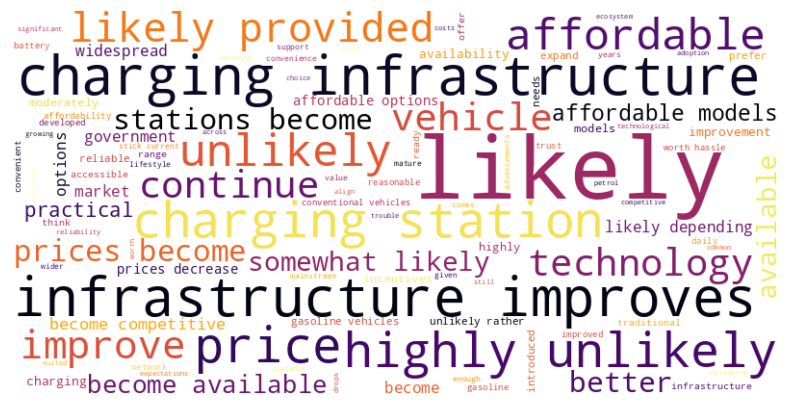

In [21]:

# Preprocess tokens by removing unwanted words
filtered_tokens = [word for word in filtered_documents['How likely are you to switch to an electric vehicle in the next 3-5 years?']
                   if word.lower() not in {'bengaluru traffic', 'traffic','bengaluru','hours','friendly','especially','option'}]

# Generate the word cloud
wordcloud = WordCloud(width=800, height=400, background_color='white',
                      max_words=100, colormap='inferno').generate(' '.join(filtered_tokens))

# Display the word cloud
plt.figure(figsize=(10, 5))
plt.imshow(wordcloud, interpolation='bilinear') # Changed interpolation to a valid value like 'bilinear'
plt.axis('off')  # Hide axes
plt.show()

## word cloud for document 5

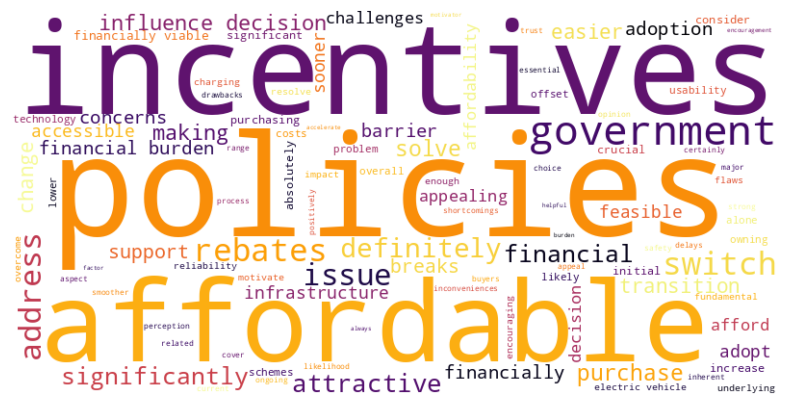

In [22]:

# Preprocess tokens by removing unwanted words
filtered_tokens = [word for word in filtered_documents['Do you think that government policies such as tax incentives or rebates would influence your decision to buy an electric vehicle?']
                   if word.lower() not in {'bengaluru traffic', 'traffic','bengaluru','hours','friendly','especially','option','ensure','create','encourage','provide','reduce',
                   'commuters','areas','vehicles'}]

# Generate the word cloud
wordcloud = WordCloud(width=800, height=400, background_color='white',
                      max_words=100, colormap='inferno').generate(' '.join(filtered_tokens))

# Display the word cloud
plt.figure(figsize=(10, 5))
plt.imshow(wordcloud, interpolation='bilinear') # Changed interpolation to a valid value like 'bilinear'
plt.axis('off')  # Hide axes
plt.show()

## Combining all the responses as one document

In [23]:
# Combine all tokens from each document into one list
all_tokens = []
for tokens in filtered_documents.values():
    all_tokens.extend(tokens)

# Find the length of the combined document
combined_document_length = len(all_tokens)

# Print the length of the combined document
print(f"Length of the combined document: {combined_document_length}")


Length of the combined document: 5695


## Word cloud of enitre responses

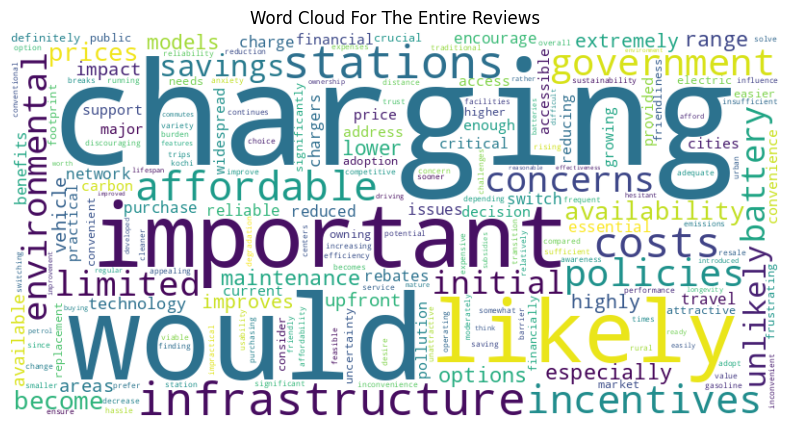

In [24]:
# List of words to remove from the entire list of words
words_to_remove = {'bengaluru','hours','commute','makes','reduce','spending',
                   'daily','better','roads','could','commuting','feels','often','still','short',
                   'traffic','planning','making','vehicles','unless','without'}

# Function to remove specific words from the combined document tokens
def remove_specific_words_from_list(tokens, words_to_remove):
    return [word for word in tokens if word not in words_to_remove]

# Remove the specified words from the combined document
cleaned_all_tokens = remove_specific_words_from_list(all_tokens, words_to_remove)

# Count the frequency of each remaining word
cleaned_word_counts = Counter(cleaned_all_tokens)

# Generate and display a word cloud for the cleaned document
wordcloud = WordCloud(width=800, height=400, background_color='white').generate_from_frequencies(cleaned_word_counts)

# Display the word cloud
plt.figure(figsize=(10, 5))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.title('Word Cloud For The Entire Reviews')
plt.show()


In [25]:
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.decomposition import LatentDirichletAllocation

# Prepare the data for LDA
documents_list = list(lemmatized_documents.values())
combined_docs = [' '.join(doc) for doc in documents_list]

# Create TF-IDF vectors
vectorizer = TfidfVectorizer(max_df=0.95, min_df=2, stop_words='english')
tfidf = vectorizer.fit_transform(combined_docs)

# Apply LDA
lda_model = LatentDirichletAllocation(n_components=5, max_iter=10, learning_method='online', random_state=42)
lda_model.fit(tfidf)


# Function to display topics
def display_topics(model, feature_names, no_top_words):
    for topic_idx, topic in enumerate(model.components_):
        print(f"Topic {topic_idx +1}:")
        print(" ".join([feature_names[i] for i in topic.argsort()[:-no_top_words - 1:-1]]))

# Display the topics
no_top_words = 10
feature_names = vectorizer.get_feature_names_out()
display_topics(lda_model, feature_names, no_top_words)

Topic 1:
incentive policy environmental cost government saving affordable lower rebate impact
Topic 2:
limited initial battery concern station area upfront range cost availability
Topic 3:
station charger essential network especially area reliable consider sufficient charge
Topic 4:
practicality replacement development major improvement availability year resale space short
Topic 5:
likely price affordable available highly especially model station availability change


# Sentiment Analysis

In [26]:
!pip install datasets
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import nltk

from matplotlib.pyplot import figure
from wordcloud import WordCloud
from sklearn.decomposition import LatentDirichletAllocation

from datasets import load_dataset
from sklearn.preprocessing import LabelEncoder  # Import LabelEncoder

#for text pre-processing
import re, string
import nltk
from nltk.tokenize import word_tokenize
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
from nltk.stem import SnowballStemmer
from nltk.corpus import wordnet
from nltk.stem import WordNetLemmatizer

nltk.download('punkt')
nltk.download('averaged_perceptron_tagger')
nltk.download('wordnet')

#for model-building
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import MultinomialNB
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import classification_report, f1_score, accuracy_score, confusion_matrix
from sklearn.metrics import roc_curve, auc, roc_auc_score
from sklearn.utils.class_weight import compute_class_weight

# bag of words
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.feature_extraction.text import CountVectorizer

#for word embedding
import gensim
from gensim.models import Word2Vec

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 480.6/480.6 kB 11.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 116.3/116.3 kB 8.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 179.3/179.3 kB 13.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 134.8/134.8 kB 9.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 194.1/194.1 kB 13.7 MB/s eta 0:00:00
  Attempting uninstall: fsspec
    Found existing installation: fsspec 2024.10.0
    Uninstalling fsspec-2024.10.0:
      Successfully uninstalled fsspec-2024.10.0
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
gcsfs 2024.10.0 requires fsspec==2024.10.0, but you have fsspec 2024.9.0 which is incompatible.


[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.
[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     /root/nltk_data...
[nltk_data]   Unzipping taggers/averaged_perceptron_tagger.zip.
[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


## Uploading the dataset having one column feasible for sentiment analysis

In [27]:
import pandas as pd

# Path to the uploaded Excel file
file_path = "/content/EV Adoption Questionnaire.xlsx"  # Adjust the path if needed

# Read the Excel file into a DataFrame
df = pd.read_excel(file_path)

# Display the first few rows to confirm the data is loaded
print(df.head())


           Name       City  \
0     John Paul  Hyderabad   
1   Kiran Kumar    Kolkata   
2  Maria Joseph     Mumbai   
3   Rohan Patil     Nagpur   
4   Sunil Jacob      Kochi   

  What factors influence your decision to adopt an electric vehicle (EV)  \
0        Low operating costs, environmental benefits                       
1      Rising cost of petrol, air pollution concerns                       
2              Quiet operation, government subsidies                       
3           Reduced noise pollution, modern features                       
4            Environmental impact, rising fuel costs                       

  How important is the availability of charging stations to your decision to purchase an EV?  \
0                  Critical for day-to-day usability                                           
1             Very important for practical usability                                           
2            Moderately important, not a dealbreaker                      

In [28]:
df= data.iloc[:, -5:]
df.head()

,What factors influence your decision to adopt an electric vehicle (EV),How important is the availability of charging stations to your decision to purchase an EV?,What do you perceive as the biggest barrier to adopting an electric vehicle?,How likely are you to switch to an electric vehicle in the next 3-5 years?,Do you think that government policies such as tax incentives or rebates would influence your decision to buy an electric vehicle?
0,"Low operating costs, environmental benefits",Critical for day-to-day usability,Lack of diverse models in the market,"Likely, if new models cater to preferences","Certainly, it would provide significant encour..."
1,"Rising cost of petrol, air pollution concerns",Very important for practical usability,High battery replacement costs,"Likely, with technological advancements","Yes, it would be a major factor."
2,"Quiet operation, government subsidies","Moderately important, not a dealbreaker",Long charging time,"Very likely, if charging speeds improve","Yes, it would encourage adoption."
3,"Reduced noise pollution, modern features",Very important for long-distance travel,Limited availability of charging stations in s...,"Likely, if there are better financing options","Definitely, it would ease the financial burden."
4,"Environmental impact, rising fuel costs","Critical, especially for long-distance commutes","Limited range, high battery costs","Likely, with better incentives","Yes, they would make the transition easier."


## Creating a new column ID

In [29]:
# Create an 'ID' column with unique identifiers
df['ID'] = range(1, len(df) + 1)

# Display the DataFrame to confirm the new column has been added
print(df.head())


  What factors influence your decision to adopt an electric vehicle (EV)  \
0        Low operating costs, environmental benefits                       
1      Rising cost of petrol, air pollution concerns                       
2              Quiet operation, government subsidies                       
3           Reduced noise pollution, modern features                       
4            Environmental impact, rising fuel costs                       

  How important is the availability of charging stations to your decision to purchase an EV?  \
0                  Critical for day-to-day usability                                           
1             Very important for practical usability                                           
2            Moderately important, not a dealbreaker                                           
3            Very important for long-distance travel                                           
4    Critical, especially for long-distance commutes           

<ipython-input-29-52ab95467992>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['ID'] = range(1, len(df) + 1)


## Rearranging the columns

In [30]:

import pandas as pd

# Load the file into a DataFrame (replace 'your_file.xlsx' with your actual file path)
data = pd.read_excel('/content/EV Adoption Questionnaire.xlsx', header=None)  # Load without treating the first row as the header

# Remove the first row and select the last 5 columns
df = data.iloc[1:, -5:].reset_index(drop=True)  # Remove first row and reset index

# Combine all columns into a single column
df['sentiment data'] = df.apply(lambda row: ' '.join(row.astype(str)), axis=1)

# Keep only the combined column
df = df[['sentiment data']]

# Display the resulting DataFrame
print(df)


                                        sentiment data
0    Low operating costs, environmental benefits Cr...
1    Rising cost of petrol, air pollution concerns ...
2    Quiet operation, government subsidies Moderate...
3    Reduced noise pollution, modern features Very ...
4    Environmental impact, rising fuel costs Critic...
..                                                 ...
210  I’m concerned about the high cost of home char...
211  The frequent software updates for EVs are anno...
212  The lack of power backup options for EVs is di...
213  The dependency on specific service centers is ...
214  The charging times for EVs are impractical for...

[215 rows x 1 columns]


In [31]:
df.columns = ['sentiment data']

# Display the resulting DataFrame
print(df)

                                        sentiment data
0    Low operating costs, environmental benefits Cr...
1    Rising cost of petrol, air pollution concerns ...
2    Quiet operation, government subsidies Moderate...
3    Reduced noise pollution, modern features Very ...
4    Environmental impact, rising fuel costs Critic...
..                                                 ...
210  I’m concerned about the high cost of home char...
211  The frequent software updates for EVs are anno...
212  The lack of power backup options for EVs is di...
213  The dependency on specific service centers is ...
214  The charging times for EVs are impractical for...

[215 rows x 1 columns]


## Converting upper case into lower case letters

In [32]:
import re

def clean_text(text):
    text = re.sub("(@[A-Za-z0-9]+)|([^0-9A-Za-z \t])|(\w+:\/\/\S+)", " ", text)
    return ' '.join(text.lower().strip().split())

# Apply the cleaning function to the 'tweetContent' column
df['cleaned_text'] = df['sentiment data'].apply(clean_text)
# Create a new column for cleaned text to keep original data

# Display the updated DataFrame
df.head()

,sentiment data,cleaned_text
0,"Low operating costs, environmental benefits Cr...",low operating costs environmental benefits cri...
1,"Rising cost of petrol, air pollution concerns ...",rising cost of petrol air pollution concerns v...
2,"Quiet operation, government subsidies Moderate...",quiet operation government subsidies moderatel...
3,"Reduced noise pollution, modern features Very ...",reduced noise pollution modern features very i...
4,"Environmental impact, rising fuel costs Critic...",environmental impact rising fuel costs critica...


In [33]:
df.drop('sentiment data', axis=1, inplace=True)
df

,cleaned_text
0,low operating costs environmental benefits cri...
1,rising cost of petrol air pollution concerns v...
2,quiet operation government subsidies moderatel...
3,reduced noise pollution modern features very i...
4,environmental impact rising fuel costs critica...
...,...
210,i m concerned about the high cost of home char...
211,the frequent software updates for evs are anno...
212,the lack of power backup options for evs is di...
213,the dependency on specific service centers is ...


## Removing stop words

In [34]:
nltk.download('punkt_tab')
nltk.download('stopwords')
def remove_stopwords(text):
    stop_words = set(stopwords.words('english'))
    words = word_tokenize(text)
    filtered_words = [word for word in words if word.lower() not in stop_words]
    return " ".join(filtered_words)

df['cleaned_text'] = df['cleaned_text'].apply(remove_stopwords)
df

[nltk_data] Downloading package punkt_tab to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt_tab.zip.
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


,cleaned_text
0,low operating costs environmental benefits cri...
1,rising cost petrol air pollution concerns impo...
2,quiet operation government subsidies moderatel...
3,reduced noise pollution modern features import...
4,environmental impact rising fuel costs critica...
...,...
210,concerned high cost home charging setups essen...
211,frequent software updates evs annoying costly ...
212,lack power backup options evs discouraging cri...
213,dependency specific service centers limiting i...


## Shape of the dataset

In [35]:
df.shape

(215, 1)

## Finding the missing values

In [36]:
# Check for missing values
print("\nMissing Values:")
print(df.isnull().sum())


Missing Values:
cleaned_text    0
dtype: int64


In [37]:
# Basic NLTK processing
df['cleaned_text'][1]

'rising cost petrol air pollution concerns important practical usability high battery replacement costs likely technological advancements yes would major factor'

## Tokenization

In [38]:
# Basic NLTK processing
example = df['cleaned_text'][1]  # Assign a value to 'example'

# Tokenization
tokens = nltk.word_tokenize(example)
tokens[:10]

['rising',
 'cost',
 'petrol',
 'air',
 'pollution',
 'concerns',
 'important',
 'practical',
 'usability',
 'high']

## POS

In [39]:
import nltk
nltk.download('averaged_perceptron_tagger_eng')
tagged = nltk.pos_tag(tokens)
tagged[:10]

[nltk_data] Downloading package averaged_perceptron_tagger_eng to
[nltk_data]     /root/nltk_data...
[nltk_data]   Unzipping taggers/averaged_perceptron_tagger_eng.zip.


[('rising', 'VBG'),
 ('cost', 'NN'),
 ('petrol', 'NN'),
 ('air', 'NN'),
 ('pollution', 'NN'),
 ('concerns', 'NNS'),
 ('important', 'JJ'),
 ('practical', 'JJ'),
 ('usability', 'NN'),
 ('high', 'JJ')]

## VADER (Rule Based Sentiment Analysis)

In [40]:
# VADER (Valence Aware Dictionary and sEntiment Reasoner) Sentiment Scoring
from nltk.sentiment import SentimentIntensityAnalyzer
from tqdm.notebook import tqdm
nltk.download('vader_lexicon')

[nltk_data] Downloading package vader_lexicon to /root/nltk_data...


True

In [41]:
sia = SentimentIntensityAnalyzer()
sia.polarity_scores(example)

{'neg': 0.0, 'neu': 0.8, 'pos': 0.2, 'compound': 0.5423}

In [42]:
# Run the polarity score on the entire dataset
res = {}
for i, row in tqdm(df.iterrows(), total=len(df)):
    text = row['cleaned_text']
    myid = i
    res[myid] = sia.polarity_scores(text)

  0%|          | 0/215 [00:00<?, ?it/s]

## Polarity score of each response

In [43]:
vaders = pd.DataFrame(res).T
vaders = vaders.reset_index().rename(columns={'index': 'ID'}) # Rename 'index' to 'ID' to match df
# Add the 'ID' column to the df DataFrame. Assuming it should align with the index.
df['ID'] = df.index
vaders = vaders.merge(df, on='ID', how='left')
vaders

,ID,neg,neu,pos,compound,cleaned_text
0,0,0.207,0.495,0.297,0.4404,low operating costs environmental benefits cri...
1,1,0.000,0.800,0.200,0.5423,rising cost petrol air pollution concerns impo...
2,2,0.000,0.567,0.433,0.8658,quiet operation government subsidies moderatel...
3,3,0.147,0.550,0.303,0.6249,reduced noise pollution modern features import...
4,4,0.132,0.533,0.335,0.7579,environmental impact rising fuel costs critica...
...,...,...,...,...,...,...
210,210,0.087,0.866,0.047,-0.2732,concerned high cost home charging setups essen...
211,211,0.268,0.605,0.127,-0.5994,frequent software updates evs annoying costly ...
212,212,0.353,0.485,0.162,-0.7964,lack power backup options evs discouraging cri...
213,213,0.185,0.695,0.120,-0.4019,dependency specific service centers limiting i...


## Lemmatization

In [44]:
import nltk
from nltk.stem import WordNetLemmatizer

nltk.download('omw-1.4')
lemmatizer = WordNetLemmatizer()

def lemmatize_and_filter(text):
    words = text.split()
    lemmatized_words = [lemmatizer.lemmatize(word) for word in words if len(word) >= 4]
    return " ".join(lemmatized_words)

df['cleaned_text'] = df['cleaned_text'].apply(lemmatize_and_filter)
df

[nltk_data] Downloading package omw-1.4 to /root/nltk_data...


,cleaned_text,ID
0,operating cost environmental benefit critical ...,0
1,rising cost petrol pollution concern important...,1
2,quiet operation government subsidy moderately ...,2
3,reduced noise pollution modern feature importa...,3
4,environmental impact rising fuel cost critical...,4
...,...,...
210,concerned high cost home charging setup essent...,210
211,frequent software update annoying costly impor...,211
212,lack power backup option discouraging critical...,212
213,dependency specific service center limiting im...,213


## Finding out the sentiments for each response

In [45]:
def get_sentiment(vaders):
    polarity = sia.polarity_scores(vaders)
    if polarity['compound'] >= 0.05:
        return "Positive"
    elif polarity['compound'] <= -0.05:
        return "Negative"
    else:
        return "Neutral"

df['Sentiment'] = df['cleaned_text'].apply(get_sentiment)
df
df[10:]

,cleaned_text,ID,Sentiment
10,reduced maintenance cost innovative design opt...,10,Positive
11,cleaner energy source reduction noise pollutio...,11,Positive
12,rising fuel cost convenience technology extrem...,12,Positive
13,reducing carbon footprint important especially...,13,Positive
14,saving fuel maintenance cost important reliabi...,14,Positive
...,...,...,...
210,concerned high cost home charging setup essent...,210,Negative
211,frequent software update annoying costly impor...,211,Negative
212,lack power backup option discouraging critical...,212,Negative
213,dependency specific service center limiting im...,213,Negative


## Distribution of Sentiments

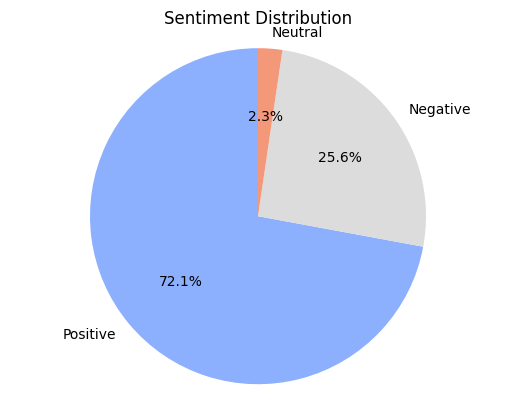

In [46]:
import matplotlib.pyplot as plt
import seaborn as sns

# Plot a pie chart of the sentiment distribution
sentiment_distribution = df['Sentiment'].value_counts(normalize=True)

# Set the coolwarm color palette
colors = sns.color_palette('coolwarm', n_colors=len(sentiment_distribution))

# Create the pie chart with specified colors
fig, ax = plt.subplots()
ax.pie(sentiment_distribution, labels=sentiment_distribution.index, autopct='%1.1f%%', startangle=90, colors=colors)
ax.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.
plt.title('Sentiment Distribution')
plt.show()

## Printing Positive sentiments

In [47]:
pos_tweets_df = df[df['Sentiment'] == 'Positive'][['cleaned_text', 'Sentiment']]


pos_tweets_df

,cleaned_text,Sentiment
0,operating cost environmental benefit critical ...,Positive
1,rising cost petrol pollution concern important...,Positive
2,quiet operation government subsidy moderately ...,Positive
3,reduced noise pollution modern feature importa...,Positive
4,environmental impact rising fuel cost critical...,Positive
...,...,...
197,seem like luxury practical option middle class...,Positive
199,find range anxiety stressful regular essential...,Positive
201,expensive average person city important kochi ...,Positive
206,upfront cost unjustifiable income level critic...,Positive


## Printing Neutral Sentiments

In [48]:
neu_tweets_df = df[df['Sentiment'] == 'Neutral'][['cleaned_text', 'Sentiment']]

# Display the first 5 rows of the new DataFrame
neu_tweets_df

,cleaned_text,Sentiment
147,expensive reliable long distance travel import...,Neutral
170,concern battery recycling environmental impact...,Neutral
176,concern hidden cost long term reliability keep...,Neutral
190,concern battery fire safety make unappealing i...,Neutral
209,battery degradation time make less appealing c...,Neutral


## Printing Negative Sentiments

In [49]:
neg_tweets_df = df[df['Sentiment'] == 'Negative'][['cleaned_text', 'Sentiment']]

neg_tweets_df

,cleaned_text,Sentiment
6,government subsidy reducing carbon footprint c...,Negative
15,sustainability lower emission critical long te...,Negative
108,overall reduction environmental pollution chea...,Negative
116,lower fuel maintenance cost growing environmen...,Negative
137,high upfront cost make less appealing traditio...,Negative
138,limited mileage high price make unattractive i...,Negative
140,high initial cost lack trust technology import...,Negative
141,expensive justify cost important lack infrastr...,Negative
142,maintenance concern long term reliability worr...,Negative
143,technology feel experimental risky invest impo...,Negative


# Modelling

In [50]:
from sklearn.model_selection import train_test_split

# Define features (X) and target variable (y)
# Use 'df' instead of 'last_five_columns' to access the 'Sentiment' column
X = df['cleaned_text']
y = df['Sentiment']

# Split the dataset into training and testing sets (70% training, 30% testing)
# Set a random seed for reproducibility
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=21)

# Display the shapes of the resulting sets
print("Training set shape:", X_train.shape, y_train.shape)
print("Testing set shape:", X_test.shape, y_test.shape)

Training set shape: (150,) (150,)
Testing set shape: (65,) (65,)


In [52]:
from sklearn.feature_extraction.text import TfidfVectorizer

# Initialize the TF-IDF vectorizer
tfidf_vectorizer = TfidfVectorizer(max_features=5000)

# Fit and transform the training data
X_train_tfidf = tfidf_vectorizer.fit_transform(X_train.astype(str))

# Transform the test data using the same vectorizer
X_test_tfidf = tfidf_vectorizer.transform(X_test.astype(str))

# Display the shape of the transformed data
print("TF-IDF Training set shape:", X_train_tfidf.shape)
print("TF-IDF Testing set shape:", X_test_tfidf.shape)

TF-IDF Training set shape: (150, 632)
TF-IDF Testing set shape: (65, 632)


## Naive Bayes

In [53]:
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

# Initialize the Naive Bayes classifier
naive_bayes_classifier = MultinomialNB()

# Train the classifier on the TF-IDF transformed training data
naive_bayes_classifier.fit(X_train_tfidf, y_train)

# Make predictions on the test data
y_pred = naive_bayes_classifier.predict(X_test_tfidf)

# Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy:.2f}")

# Display classification report and confusion matrix
print("\nClassification Report:")
print(classification_report(y_test, y_pred))

print("\nConfusion Matrix:")
print(confusion_matrix(y_test, y_pred))

Accuracy: 0.66

Classification Report:
              precision    recall  f1-score   support

    Negative       1.00      0.09      0.17        22
     Neutral       0.00      0.00      0.00         2
    Positive       0.65      1.00      0.79        41

    accuracy                           0.66        65
   macro avg       0.55      0.36      0.32        65
weighted avg       0.75      0.66      0.55        65


Confusion Matrix:
[[ 2  0 20]
 [ 0  0  2]
 [ 0  0 41]]


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


## Accuracy 66%

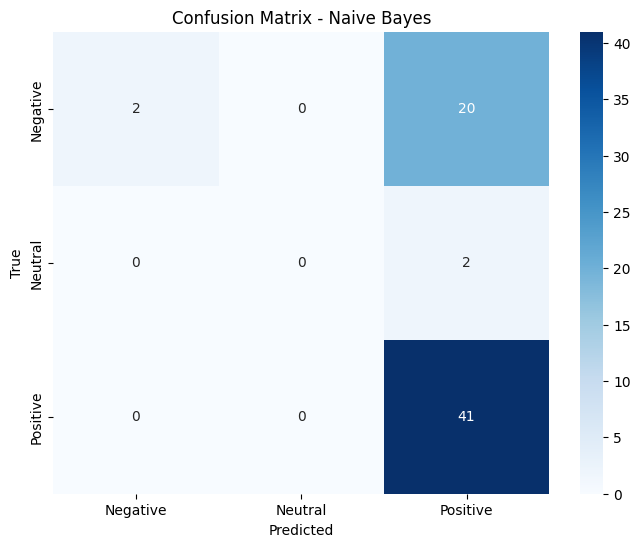

In [54]:
# Initialize LabelEncoder
le = LabelEncoder()

# Convert string labels to numerical format using LabelEncoder
y_test_numeric = le.fit_transform(y_test)

# Display confusion matrix heatmap for Naive Bayes
plt.figure(figsize=(8, 6))
cm_nb = confusion_matrix(y_test, y_pred)
sns.heatmap(cm_nb, annot=True, fmt="d", cmap="Blues", xticklabels=le.classes_, yticklabels=le.classes_)
plt.title('Confusion Matrix - Naive Bayes')
plt.xlabel('Predicted')
plt.ylabel('True')
plt.show()

## SVM

In [55]:
from sklearn.svm import SVC

# Initialize the SVM classifier
svm_classifier = SVC()

# Train the classifier on the TF-IDF transformed training data
svm_classifier.fit(X_train_tfidf, y_train)

# Make predictions on the test data
y_pred_svm = svm_classifier.predict(X_test_tfidf)

# Evaluate the model
accuracy_svm = accuracy_score(y_test, y_pred_svm)
print(f"Accuracy: {accuracy_svm:.2f}")

# Display classification report and confusion matrix
print("\nClassification Report:")
print(classification_report(y_test, y_pred_svm))

print("\nConfusion Matrix:")
print(confusion_matrix(y_test, y_pred_svm))

Accuracy: 0.66

Classification Report:
              precision    recall  f1-score   support

    Negative       1.00      0.09      0.17        22
     Neutral       0.00      0.00      0.00         2
    Positive       0.65      1.00      0.79        41

    accuracy                           0.66        65
   macro avg       0.55      0.36      0.32        65
weighted avg       0.75      0.66      0.55        65


Confusion Matrix:
[[ 2  0 20]
 [ 0  0  2]
 [ 0  0 41]]


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


## Accuracy 66%

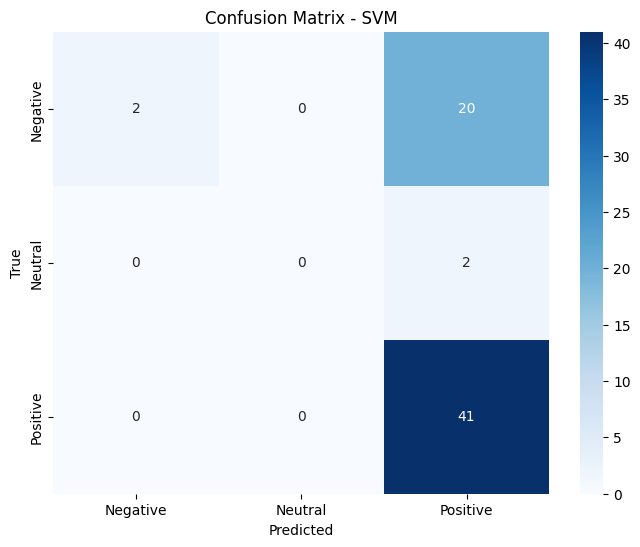

In [56]:
# Initialize LabelEncoder
le = LabelEncoder()

# Convert string labels to numerical format using LabelEncoder
y_test_numeric = le.fit_transform(y_test)

# Display confusion matrix heatmap for SVM
plt.figure(figsize=(8, 6))
cm_svm = confusion_matrix(y_test, y_pred_svm)
sns.heatmap(cm_svm, annot=True, fmt="d", cmap="Blues", xticklabels=le.classes_, yticklabels=le.classes_)
plt.title('Confusion Matrix - SVM')
plt.xlabel('Predicted')
plt.ylabel('True')
plt.show()

## Hybrid (VADER + SVM), Accuracy 97%

Hybrid Model Accuracy: 0.97

Hybrid Model Classification Report:
              precision    recall  f1-score   support

    Negative       0.96      1.00      0.98        22
     Neutral       0.00      0.00      0.00         2
    Positive       0.98      1.00      0.99        41

    accuracy                           0.97        65
   macro avg       0.64      0.67      0.66        65
weighted avg       0.94      0.97      0.95        65


Hybrid Model Confusion Matrix:
[[22  0  0]
 [ 1  0  1]
 [ 0  0 41]]


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


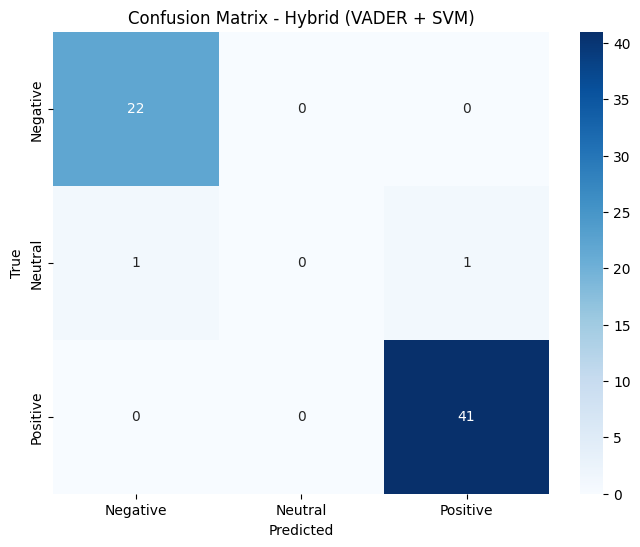

In [57]:
from sklearn.feature_extraction.text import TfidfVectorizer
from nltk.sentiment.vader import SentimentIntensityAnalyzer
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
from sklearn.preprocessing import LabelEncoder
import matplotlib.pyplot as plt
import seaborn as sns
from tqdm import tqdm

# Assuming df is your DataFrame with 'cleaned_text' and 'Sentiment' columns
# and X_train_tfidf, X_test_tfidf, y_train, y_test are already defined

# Initialize VADER sentiment analyzer
sia = SentimentIntensityAnalyzer()

# Function to get VADER scores
def get_vader_scores(text):
    return sia.polarity_scores(text)['compound']

# Get VADER scores for training and testing data
X_train_vader = [get_vader_scores(text) for text in X_train]
X_test_vader = [get_vader_scores(text) for text in X_test]

# Combine TF-IDF and VADER features
from scipy.sparse import hstack
X_train_combined = hstack([X_train_tfidf, [[score] for score in X_train_vader]])
X_test_combined = hstack([X_test_tfidf, [[score] for score in X_test_vader]])

# Initialize and train the SVM classifier with combined features
svm_classifier_hybrid = SVC()
svm_classifier_hybrid.fit(X_train_combined, y_train)

# Make predictions on the test data
y_pred_hybrid = svm_classifier_hybrid.predict(X_test_combined)

# Evaluate the model
accuracy_hybrid = accuracy_score(y_test, y_pred_hybrid)
print(f"Hybrid Model Accuracy: {accuracy_hybrid:.2f}")

print("\nHybrid Model Classification Report:")
print(classification_report(y_test, y_pred_hybrid))

print("\nHybrid Model Confusion Matrix:")
print(confusion_matrix(y_test, y_pred_hybrid))

# Initialize LabelEncoder
le = LabelEncoder()

# Convert string labels to numerical format using LabelEncoder
y_test_numeric = le.fit_transform(y_test)

# Display confusion matrix heatmap for Hybrid Model
plt.figure(figsize=(8, 6))
cm_hybrid = confusion_matrix(y_test, y_pred_hybrid)
sns.heatmap(cm_hybrid, annot=True, fmt="d", cmap="Blues", xticklabels=le.classes_, yticklabels=le.classes_)
plt.title('Confusion Matrix - Hybrid (VADER + SVM)')
plt.xlabel('Predicted')
plt.ylabel('True')
plt.show()

# Sentence wise analysis

In [58]:
import pandas as pd

# Path to the uploaded Excel file
file_path1 = "/content/EV Adoption Questionnaire.xlsx"  # Adjust the path if needed

# Read the Excel file into a DataFrame
data = pd.read_excel(file_path1)  # Use 'data' instead of 'df1'
last_five_columns = data.iloc[:, -5:]  # Select the last 5 columns of the DataFrame 'data'

# Display the first few rows to confirm the data is loaded
print(last_five_columns.head())


  What factors influence your decision to adopt an electric vehicle (EV)  \
0        Low operating costs, environmental benefits                       
1      Rising cost of petrol, air pollution concerns                       
2              Quiet operation, government subsidies                       
3           Reduced noise pollution, modern features                       
4            Environmental impact, rising fuel costs                       

  How important is the availability of charging stations to your decision to purchase an EV?  \
0                  Critical for day-to-day usability                                           
1             Very important for practical usability                                           
2            Moderately important, not a dealbreaker                                           
3            Very important for long-distance travel                                           
4    Critical, especially for long-distance commutes           

In [59]:
# Create an 'ID' column with unique identifiers based on the length of last_five_columns
last_five_columns['ID'] = range(1, len(last_five_columns) + 1)

# Display the DataFrame to confirm the new column has been added
print(last_five_columns.head())

  What factors influence your decision to adopt an electric vehicle (EV)  \
0        Low operating costs, environmental benefits                       
1      Rising cost of petrol, air pollution concerns                       
2              Quiet operation, government subsidies                       
3           Reduced noise pollution, modern features                       
4            Environmental impact, rising fuel costs                       

  How important is the availability of charging stations to your decision to purchase an EV?  \
0                  Critical for day-to-day usability                                           
1             Very important for practical usability                                           
2            Moderately important, not a dealbreaker                                           
3            Very important for long-distance travel                                           
4    Critical, especially for long-distance commutes           

<ipython-input-59-8114cb97d57a>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  last_five_columns['ID'] = range(1, len(last_five_columns) + 1)


In [60]:
# Set option to display full column width
pd.set_option('display.max_colwidth', None)

# Display the DataFrame to confirm the new column has been added
print(last_five_columns)

    What factors influence your decision to adopt an electric vehicle (EV)  \
0                              Low operating costs, environmental benefits   
1                            Rising cost of petrol, air pollution concerns   
2                                    Quiet operation, government subsidies   
3                                 Reduced noise pollution, modern features   
4                                  Environmental impact, rising fuel costs   
..                                                                     ...   
210             I’m concerned about the high cost of home charging setups.   
211         The frequent software updates for EVs are annoying and costly.   
212              The lack of power backup options for EVs is discouraging.   
213                The dependency on specific service centers is limiting.   
214            The charging times for EVs are impractical for my schedule.   

    How important is the availability of charging stations to y

In [61]:
# Assuming 'last_five_columns' contains your original last 5 columns

# Combine all columns into a single 'sentiment data' column
last_five_columns['sentiment data'] = last_five_columns.apply(lambda row: ' '.join(row.astype(str)), axis=1)

import re

def clean_text(text):
    text = re.sub("(@[A-Za-z0-9]+)|([^0-9A-Za-z \t])|(\w+:\/\/\S+)", " ", text)
    return ' '.join(text.lower().strip().split())

# Apply the cleaning function to the 'sentiment data' column
last_five_columns['cleaned data'] = last_five_columns['sentiment data'].apply(clean_text)

# Display the updated DataFrame
last_five_columns.head()

,What factors influence your decision to adopt an electric vehicle (EV),How important is the availability of charging stations to your decision to purchase an EV?,What do you perceive as the biggest barrier to adopting an electric vehicle?,How likely are you to switch to an electric vehicle in the next 3-5 years?,Do you think that government policies such as tax incentives or rebates would influence your decision to buy an electric vehicle?,ID,sentiment data,cleaned data
0,"Low operating costs, environmental benefits",Critical for day-to-day usability,Lack of diverse models in the market,"Likely, if new models cater to preferences","Certainly, it would provide significant encouragement.",1,"Low operating costs, environmental benefits Critical for day-to-day usability Lack of diverse models in the market Likely, if new models cater to preferences Certainly, it would provide significant encouragement. 1",low operating costs environmental benefits critical for day to day usability lack of diverse models in the market likely if new models cater to preferences certainly it would provide significant encouragement 1
1,"Rising cost of petrol, air pollution concerns",Very important for practical usability,High battery replacement costs,"Likely, with technological advancements","Yes, it would be a major factor.",2,"Rising cost of petrol, air pollution concerns Very important for practical usability High battery replacement costs Likely, with technological advancements Yes, it would be a major factor. 2",rising cost of petrol air pollution concerns very important for practical usability high battery replacement costs likely with technological advancements yes it would be a major factor 2
2,"Quiet operation, government subsidies","Moderately important, not a dealbreaker",Long charging time,"Very likely, if charging speeds improve","Yes, it would encourage adoption.",3,"Quiet operation, government subsidies Moderately important, not a dealbreaker Long charging time Very likely, if charging speeds improve Yes, it would encourage adoption. 3",quiet operation government subsidies moderately important not a dealbreaker long charging time very likely if charging speeds improve yes it would encourage adoption 3
3,"Reduced noise pollution, modern features",Very important for long-distance travel,Limited availability of charging stations in smaller cities,"Likely, if there are better financing options","Definitely, it would ease the financial burden.",4,"Reduced noise pollution, modern features Very important for long-distance travel Limited availability of charging stations in smaller cities Likely, if there are better financing options Definitely, it would ease the financial burden. 4",reduced noise pollution modern features very important for long distance travel limited availability of charging stations in smaller cities likely if there are better financing options definitely it would ease the financial burden 4
4,"Environmental impact, rising fuel costs","Critical, especially for long-distance commutes","Limited range, high battery costs","Likely, with better incentives","Yes, they would make the transition easier.",5,"Environmental impact, rising fuel costs Critical, especially for long-distance commutes Limited range, high battery costs Likely, with better incentives Yes, they would make the transition easier. 5",environmental impact rising fuel costs critical especially for long distance commutes limited range high battery costs likely with better incentives yes they would make the transition easier 5


In [ ]:
last_five_columns.drop('cleaned data', axis=1, inplace=True)
last_five_columns

,What factors influence your decision to adopt an electric vehicle (EV),How important is the availability of charging stations to your decision to purchase an EV?,What do you perceive as the biggest barrier to adopting an electric vehicle?,How likely are you to switch to an electric vehicle in the next 3-5 years?,Do you think that government policies such as tax incentives or rebates would influence your decision to buy an electric vehicle?,ID,sentiment data
0,"Low operating costs, environmental benefits",Critical for day-to-day usability,Lack of diverse models in the market,"Likely, if new models cater to preferences","Certainly, it would provide significant encouragement.",1,"Low operating costs, environmental benefits Critical for day-to-day usability Lack of diverse models in the market Likely, if new models cater to preferences Certainly, it would provide significant encouragement. 1"
1,"Rising cost of petrol, air pollution concerns",Very important for practical usability,High battery replacement costs,"Likely, with technological advancements","Yes, it would be a major factor.",2,"Rising cost of petrol, air pollution concerns Very important for practical usability High battery replacement costs Likely, with technological advancements Yes, it would be a major factor. 2"
2,"Quiet operation, government subsidies","Moderately important, not a dealbreaker",Long charging time,"Very likely, if charging speeds improve","Yes, it would encourage adoption.",3,"Quiet operation, government subsidies Moderately important, not a dealbreaker Long charging time Very likely, if charging speeds improve Yes, it would encourage adoption. 3"
3,"Reduced noise pollution, modern features",Very important for long-distance travel,Limited availability of charging stations in smaller cities,"Likely, if there are better financing options","Definitely, it would ease the financial burden.",4,"Reduced noise pollution, modern features Very important for long-distance travel Limited availability of charging stations in smaller cities Likely, if there are better financing options Definitely, it would ease the financial burden. 4"
4,"Environmental impact, rising fuel costs","Critical, especially for long-distance commutes","Limited range, high battery costs","Likely, with better incentives","Yes, they would make the transition easier.",5,"Environmental impact, rising fuel costs Critical, especially for long-distance commutes Limited range, high battery costs Likely, with better incentives Yes, they would make the transition easier. 5"
...,...,...,...,...,...,...,...
210,I’m concerned about the high cost of home charging setups.,"Essential, but public chargers in Kochi are poorly maintained.",The unavailability of service centers for EVs is a big issue.,Unlikely. EVs seem too inconvenient for now.,"No, rebates won’t address the infrastructure challenges.",211,"I’m concerned about the high cost of home charging setups. Essential, but public chargers in Kochi are poorly maintained. The unavailability of service centers for EVs is a big issue. Unlikely. EVs seem too inconvenient for now. No, rebates won’t address the infrastructure challenges. 211"
211,The frequent software updates for EVs are annoying and costly.,"Very important, but Kolkata lacks a sufficient network of chargers.",The lack of standardization among chargers is frustrating.,Highly unlikely. I’d rather stick to my current vehicle.,"No, government schemes won’t resolve these issues.",212,"The frequent software updates for EVs are annoying and costly. Very important, but Kolkata lacks a sufficient network of chargers. The lack of standardization among chargers is frustrating. Highly unlikely. I’d rather stick to my current vehicle. No, government schemes won’t resolve these issues. 212"
212,The lack of power backup options for EVs is discouraging.,"Critical, but chargers in Mangalore are scarce and unreliable.",The frequent breakdowns reported by EV users worry me.,Not at all likely. EVs are not wo

In [62]:
nltk.download('punkt_tab')
nltk.download('stopwords')
def remove_stopwords(text):
    stop_words = set(stopwords.words('english'))
    words = word_tokenize(text)
    filtered_words = [word for word in words if word.lower() not in stop_words]
    return " ".join(filtered_words)

# Apply the 'remove_stopwords' function to the 'sentiment data' column to create the 'cleaned_text' column
last_five_columns['cleaned_text'] = last_five_columns['sentiment data'].apply(remove_stopwords) # Changed 'cleaned_text' to 'sentiment data'
last_five_columns.head()

[nltk_data] Downloading package punkt_tab to /root/nltk_data...
[nltk_data]   Package punkt_tab is already up-to-date!
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


,What factors influence your decision to adopt an electric vehicle (EV),How important is the availability of charging stations to your decision to purchase an EV?,What do you perceive as the biggest barrier to adopting an electric vehicle?,How likely are you to switch to an electric vehicle in the next 3-5 years?,Do you think that government policies such as tax incentives or rebates would influence your decision to buy an electric vehicle?,ID,sentiment data,cleaned data,cleaned_text
0,"Low operating costs, environmental benefits",Critical for day-to-day usability,Lack of diverse models in the market,"Likely, if new models cater to preferences","Certainly, it would provide significant encouragement.",1,"Low operating costs, environmental benefits Critical for day-to-day usability Lack of diverse models in the market Likely, if new models cater to preferences Certainly, it would provide significant encouragement. 1",low operating costs environmental benefits critical for day to day usability lack of diverse models in the market likely if new models cater to preferences certainly it would provide significant encouragement 1,"Low operating costs , environmental benefits Critical day-to-day usability Lack diverse models market Likely , new models cater preferences Certainly , would provide significant encouragement . 1"
1,"Rising cost of petrol, air pollution concerns",Very important for practical usability,High battery replacement costs,"Likely, with technological advancements","Yes, it would be a major factor.",2,"Rising cost of petrol, air pollution concerns Very important for practical usability High battery replacement costs Likely, with technological advancements Yes, it would be a major factor. 2",rising cost of petrol air pollution concerns very important for practical usability high battery replacement costs likely with technological advancements yes it would be a major factor 2,"Rising cost petrol , air pollution concerns important practical usability High battery replacement costs Likely , technological advancements Yes , would major factor . 2"
2,"Quiet operation, government subsidies","Moderately important, not a dealbreaker",Long charging time,"Very likely, if charging speeds improve","Yes, it would encourage adoption.",3,"Quiet operation, government subsidies Moderately important, not a dealbreaker Long charging time Very likely, if charging speeds improve Yes, it would encourage adoption. 3",quiet operation government subsidies moderately important not a dealbreaker long charging time very likely if charging speeds improve yes it would encourage adoption 3,"Quiet operation , government subsidies Moderately important , dealbreaker Long charging time likely , charging speeds improve Yes , would encourage adoption . 3"
3,"Reduced noise pollution, modern features",Very important for long-distance travel,Limited availability of charging stations in smaller cities,"Likely, if there are better financing options","Definitely, it would ease the financial burden.",4,"Reduced noise pollution, modern features Very important for long-distance travel Limited availability of charging stations in smaller cities Likely, if there are better financing options Definitely, it would ease the financial burden. 4",reduced noise pollution modern features very important for long distance travel limited availability of charging stations in smaller cities likely if there are better financing options definitely it would ease the financial burden 4,"Reduced noise pollution , modern features important long-distance travel Limited availability charging stations smaller cities Likely , better financing options Definitely , would ease financial burden . 4"
4,"Environmental impact, rising fuel costs","Critical, especially for long-distance commutes","Limited range, high battery costs","Likely, with better incentives","Yes, they would make the transition easier.",5,"Environmental impact, rising fuel costs Critical, especially for long-distance commut

In [63]:
last_five_columns.shape

(215, 9)

finding the missing values

In [64]:
# Check for missing values
print("\nMissing Values:")
print(df.isnull().sum())


Missing Values:
cleaned_text    0
ID              0
Sentiment       0
dtype: int64


In [65]:
# Basic NLTK processing
last_five_columns['cleaned_text'][100]

"Environmental concerns , reduced fuel maintenance costs , increasing availability charging stations . ’ essential . Without easy access charging stations , owning EV ’ feasible . higher initial cost doubts vehicle 's range long trips . likely , price becomes competitive infrastructure improves . Yes , policies would make EVs much affordable likely encourage adopt one . 101"

In [66]:
last_five_columns['cleaned_text'][100]

"Environmental concerns , reduced fuel maintenance costs , increasing availability charging stations . ’ essential . Without easy access charging stations , owning EV ’ feasible . higher initial cost doubts vehicle 's range long trips . likely , price becomes competitive infrastructure improves . Yes , policies would make EVs much affordable likely encourage adopt one . 101"

In [67]:
# Basic NLTK processing
example = last_five_columns['cleaned_text']
print(example)

0                                                           Low operating costs , environmental benefits Critical day-to-day usability Lack diverse models market Likely , new models cater preferences Certainly , would provide significant encouragement . 1
1                                                                                     Rising cost petrol , air pollution concerns important practical usability High battery replacement costs Likely , technological advancements Yes , would major factor . 2
2                                                                                              Quiet operation , government subsidies Moderately important , dealbreaker Long charging time likely , charging speeds improve Yes , would encourage adoption . 3
3                                                 Reduced noise pollution , modern features important long-distance travel Limited availability charging stations smaller cities Likely , better financing options Definitely , would ea

In [68]:
# Apply word_tokenize to each element of the Series
tokens = last_five_columns['cleaned_text'].apply(nltk.word_tokenize)

# Access tokens for a specific row (e.g., row 0)
print(tokens[0][:20])  # Print first 10 tokens of the first row

['Low', 'operating', 'costs', ',', 'environmental', 'benefits', 'Critical', 'day-to-day', 'usability', 'Lack', 'diverse', 'models', 'market', 'Likely', ',', 'new', 'models', 'cater', 'preferences', 'Certainly']


In [69]:
import nltk
nltk.download('averaged_perceptron_tagger_eng')

# Assuming 'tokens' is your Series of token lists
# Flatten the list of lists into a single list of tokens
all_tokens = [token for sublist in tokens for token in sublist]

# Apply pos_tag to the flattened list
tagged = nltk.pos_tag(all_tokens)

# Now you can access the tagged tokens
print(tagged[:10])

[nltk_data] Downloading package averaged_perceptron_tagger_eng to
[nltk_data]     /root/nltk_data...
[nltk_data]   Package averaged_perceptron_tagger_eng is already up-to-
[nltk_data]       date!


[('Low', 'JJ'), ('operating', 'NN'), ('costs', 'NNS'), (',', ','), ('environmental', 'JJ'), ('benefits', 'NNS'), ('Critical', 'JJ'), ('day-to-day', 'JJ'), ('usability', 'NN'), ('Lack', 'NNP')]


VADER-RULE BASED SENTIMENT ANALYSIS

In [70]:
# VADER (Valence Aware Dictionary and sEntiment Reasoner) Sentiment Scoring
from nltk.sentiment import SentimentIntensityAnalyzer
from tqdm.notebook import tqdm
nltk.download('vader_lexicon')

[nltk_data] Downloading package vader_lexicon to /root/nltk_data...
[nltk_data]   Package vader_lexicon is already up-to-date!


True

In [ ]:
sia = SentimentIntensityAnalyzer()

# Iterate over the 'cleaned_text' column and apply polarity_scores to each element
res = {}
for i, row in tqdm(last_five_columns.iterrows(), total=len(last_five_columns)):  # Iterate over rows
    text = row['cleaned_text']  # Get text from the 'cleaned_text' column
    myid = i
    res[myid] = sia.polarity_scores(text)  # Apply sia to the text

  0%|          | 0/215 [00:00<?, ?it/s]

In [ ]:
# Run the polarity score on the entire dataset
res = {}
for i, row in tqdm(last_five_columns.iterrows(), total=len(df)):
    text = row['cleaned_text']
    myid = i
    res[myid] = sia.polarity_scores(text)

  0%|          | 0/215 [00:00<?, ?it/s]

In [ ]:
vaders = pd.DataFrame(res).T
vaders = vaders.reset_index().rename(columns={'index': 'ID'}) # Rename 'index' to 'ID' to match df
vaders = vaders.merge(df, on='ID', how='left') # Merge on 'ID'
vaders

,ID,neg,neu,pos,compound,cleaned_text,Sentiment
0,0,0.214,0.479,0.307,0.4404,operating cost environmental benefit critical usability lack diverse model market likely model cater preference certainly would provide significant encouragement,Positive
1,1,0.000,0.800,0.200,0.5423,rising cost petrol pollution concern important practical usability high battery replacement cost likely technological advancement would major factor,Positive
2,2,0.000,0.567,0.433,0.8658,quiet operation government subsidy moderately important dealbreaker long charging time likely charging speed improve would encourage adoption,Positive
3,3,0.151,0.536,0.312,0.6249,reduced noise pollution modern feature important long distance travel limited availability charging station smaller city likely better financing option definitely would ease financial burden,Positive
4,4,0.143,0.513,0.343,0.7380,environmental impact rising fuel cost critical especially long distance commute limited range high battery cost likely better incentive would make transition easier,Positive
...,...,...,...,...,...,...,...
210,210,0.084,0.871,0.045,-0.2732,concerned high cost home charging setup essential public charger kochi poorly maintained unavailability service center issue unlikely seem inconvenient rebate address infrastructure challenge,Negative
211,211,0.261,0.616,0.123,-0.5994,frequent software update annoying costly important kolkata lack sufficient network charger lack standardization among charger frustrating highly unlikely rather stick current vehicle government scheme resolve issue,Negative
212,212,0.344,0.499,0.157,-0.7964,lack power backup option discouraging critical charger mangalore scarce unreliable frequent breakdown reported user worry likely worth hassle incentive solve reliability problem,Negative
213,213,0.178,0.706,0.115,-0.4019,dependency specific service center limiting important infrastructure limited number model budget frustrating highly unlikely suit requirement policy make accessible,Negative


In [71]:
import nltk
from nltk.stem import WordNetLemmatizer

nltk.download('omw-1.4')
lemmatizer = WordNetLemmatizer()

def lemmatize_and_filter(text):
    words = text.split()
    lemmatized_words = [lemmatizer.lemmatize(word) for word in words if len(word) >= 4]
    return " ".join(lemmatized_words)

last_five_columns['cleaned_text'] = last_five_columns['cleaned_text'].apply(lemmatize_and_filter)
last_five_columns

[nltk_data] Downloading package omw-1.4 to /root/nltk_data...
[nltk_data]   Package omw-1.4 is already up-to-date!


,What factors influence your decision to adopt an electric vehicle (EV),How important is the availability of charging stations to your decision to purchase an EV?,What do you perceive as the biggest barrier to adopting an electric vehicle?,How likely are you to switch to an electric vehicle in the next 3-5 years?,Do you think that government policies such as tax incentives or rebates would influence your decision to buy an electric vehicle?,ID,sentiment data,cleaned data,cleaned_text
0,"Low operating costs, environmental benefits",Critical for day-to-day usability,Lack of diverse models in the market,"Likely, if new models cater to preferences","Certainly, it would provide significant encouragement.",1,"Low operating costs, environmental benefits Critical for day-to-day usability Lack of diverse models in the market Likely, if new models cater to preferences Certainly, it would provide significant encouragement. 1",low operating costs environmental benefits critical for day to day usability lack of diverse models in the market likely if new models cater to preferences certainly it would provide significant encouragement 1,operating cost environmental benefit Critical day-to-day usability Lack diverse model market Likely model cater preference Certainly would provide significant encouragement
1,"Rising cost of petrol, air pollution concerns",Very important for practical usability,High battery replacement costs,"Likely, with technological advancements","Yes, it would be a major factor.",2,"Rising cost of petrol, air pollution concerns Very important for practical usability High battery replacement costs Likely, with technological advancements Yes, it would be a major factor. 2",rising cost of petrol air pollution concerns very important for practical usability high battery replacement costs likely with technological advancements yes it would be a major factor 2,Rising cost petrol pollution concern important practical usability High battery replacement cost Likely technological advancement would major factor
2,"Quiet operation, government subsidies","Moderately important, not a dealbreaker",Long charging time,"Very likely, if charging speeds improve","Yes, it would encourage adoption.",3,"Quiet operation, government subsidies Moderately important, not a dealbreaker Long charging time Very likely, if charging speeds improve Yes, it would encourage adoption. 3",quiet operation government subsidies moderately important not a dealbreaker long charging time very likely if charging speeds improve yes it would encourage adoption 3,Quiet operation government subsidy Moderately important dealbreaker Long charging time likely charging speed improve would encourage adoption
3,"Reduced noise pollution, modern features",Very important for long-distance travel,Limited availability of charging stations in smaller cities,"Likely, if there are better financing options","Definitely, it would ease the financial burden.",4,"Reduced noise pollution, modern features Very important for long-distance travel Limited availability of charging stations in smaller cities Likely, if there are better financing options Definitely, it would ease the financial burden. 4",reduced noise pollution modern features very important for long distance travel limited availability of charging stations in smaller cities likely if there are better financing options definitely it would ease the financial burden 4,Reduced noise pollution modern feature important long-distance travel Limited availability charging station smaller city Likely better financing option Definitely would ease financial burden
4,"Environmental impact, rising fuel costs","Critical, especially for long-distance commutes","Limited range, high battery costs","Likely, with better incentives","Yes, they would make the transition easier.",5,"Environmental impact, rising fuel costs Critical, especially for long-distance commutes Limited range, high battery costs Likely, with better incentives Yes, they would ma

In [72]:
def get_sentiment(vaders):
    polarity = sia.polarity_scores(vaders)
    if polarity['compound'] >= 0.05:
        return "Positive"
    elif polarity['compound'] <= -0.05:
        return "Negative"
    else:
        return "Neutral"

last_five_columns['Sentiment'] = last_five_columns['cleaned_text'].apply(get_sentiment)
last_five_columns

,What factors influence your decision to adopt an electric vehicle (EV),How important is the availability of charging stations to your decision to purchase an EV?,What do you perceive as the biggest barrier to adopting an electric vehicle?,How likely are you to switch to an electric vehicle in the next 3-5 years?,Do you think that government policies such as tax incentives or rebates would influence your decision to buy an electric vehicle?,ID,sentiment data,cleaned data,cleaned_text,Sentiment
0,"Low operating costs, environmental benefits",Critical for day-to-day usability,Lack of diverse models in the market,"Likely, if new models cater to preferences","Certainly, it would provide significant encouragement.",1,"Low operating costs, environmental benefits Critical for day-to-day usability Lack of diverse models in the market Likely, if new models cater to preferences Certainly, it would provide significant encouragement. 1",low operating costs environmental benefits critical for day to day usability lack of diverse models in the market likely if new models cater to preferences certainly it would provide significant encouragement 1,operating cost environmental benefit Critical day-to-day usability Lack diverse model market Likely model cater preference Certainly would provide significant encouragement,Positive
1,"Rising cost of petrol, air pollution concerns",Very important for practical usability,High battery replacement costs,"Likely, with technological advancements","Yes, it would be a major factor.",2,"Rising cost of petrol, air pollution concerns Very important for practical usability High battery replacement costs Likely, with technological advancements Yes, it would be a major factor. 2",rising cost of petrol air pollution concerns very important for practical usability high battery replacement costs likely with technological advancements yes it would be a major factor 2,Rising cost petrol pollution concern important practical usability High battery replacement cost Likely technological advancement would major factor,Positive
2,"Quiet operation, government subsidies","Moderately important, not a dealbreaker",Long charging time,"Very likely, if charging speeds improve","Yes, it would encourage adoption.",3,"Quiet operation, government subsidies Moderately important, not a dealbreaker Long charging time Very likely, if charging speeds improve Yes, it would encourage adoption. 3",quiet operation government subsidies moderately important not a dealbreaker long charging time very likely if charging speeds improve yes it would encourage adoption 3,Quiet operation government subsidy Moderately important dealbreaker Long charging time likely charging speed improve would encourage adoption,Positive
3,"Reduced noise pollution, modern features",Very important for long-distance travel,Limited availability of charging stations in smaller cities,"Likely, if there are better financing options","Definitely, it would ease the financial burden.",4,"Reduced noise pollution, modern features Very important for long-distance travel Limited availability of charging stations in smaller cities Likely, if there are better financing options Definitely, it would ease the financial burden. 4",reduced noise pollution modern features very important for long distance travel limited availability of charging stations in smaller cities likely if there are better financing options definitely it would ease the financial burden 4,Reduced noise pollution modern feature important long-distance travel Limited availability charging station smaller city Likely better financing option Definitely would ease financial burden,Positive
4,"Environmental impact, rising fuel costs","Critical, especially for long-distance commutes","Limited range, high battery costs","Likely, with better incentives","Yes, they would make the transition easier.",5,"Environmental impact, rising fuel costs Critical, especially for long-distance commutes Limited range, high battery costs Lik

Distribution of sentiments

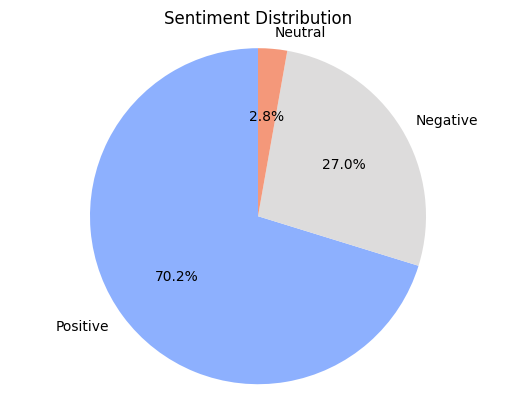

In [73]:
import matplotlib.pyplot as plt
import seaborn as sns

# Plot a pie chart of the sentiment distribution
sentiment_distribution = last_five_columns['Sentiment'].value_counts(normalize=True)

# Set the coolwarm color palette
colors = sns.color_palette('coolwarm', n_colors=len(sentiment_distribution))

# Create the pie chart with specified colors
fig, ax = plt.subplots()
ax.pie(sentiment_distribution, labels=sentiment_distribution.index, autopct='%1.1f%%', startangle=90, colors=colors)
ax.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.
plt.title('Sentiment Distribution')
plt.show()

Printing the positive sentiments

In [74]:
pos_tweets_df = last_five_columns[last_five_columns['Sentiment'] == 'Positive'][['cleaned_text', 'Sentiment']]
pos_tweets_df

,cleaned_text,Sentiment
0,operating cost environmental benefit Critical day-to-day usability Lack diverse model market Likely model cater preference Certainly would provide significant encouragement,Positive
1,Rising cost petrol pollution concern important practical usability High battery replacement cost Likely technological advancement would major factor,Positive
2,Quiet operation government subsidy Moderately important dealbreaker Long charging time likely charging speed improve would encourage adoption,Positive
3,Reduced noise pollution modern feature important long-distance travel Limited availability charging station smaller city Likely better financing option Definitely would ease financial burden,Positive
4,Environmental impact rising fuel cost Critical especially long-distance commute Limited range high battery cost Likely better incentive would make transition easier,Positive
...,...,...
197,seem like luxury practical option middle class Essential lack fast charger frustrating battery reduced efficiency time concerning Unlikely technology mature enough incentive help afford,Positive
199,find range anxiety stressful regular Essential Kochi infrastructure almost nonexistent unavailability charging station near home deal-breaker Unlikely trust long drive government incentive change mind,Positive
201,expensive average person city important Kochi charging option unproven long-term durability concern likely Gasoline vehicle seem economical incentive change perspective,Positive
206,upfront cost unjustifiable income level Critical Indore enough charger convenience inconsistent battery performance extreme weather issue Highly unlikely suitable need policy help affordability,Positive


Neutral sentiments

In [75]:
neu_tweets_df = last_five_columns[last_five_columns['Sentiment'] == 'Neutral'][['cleaned_text', 'Sentiment']]
# Display the first 5 rows of the new DataFrame
neu_tweets_df

,cleaned_text,Sentiment
16,Environmental benefit reduced pollution important especially trip across state Limited range single charge likely EV-friendly infrastructure developed would significantly reduce financial burden,Neutral
147,expensive reliable long-distance travel Important enough station make practical high cost installation limited battery life deal-breakers Highly unlikely meet expectation convenience cost government policy fundamental issue,Neutral
170,Concerns battery recycling environmental impact discouraging Important charger area almost non-existent limited option fast charging make impractical Highly unlikely feel like compromise upgrade policy change perception,Neutral
176,Concerns hidden cost long-term reliability keep hesitant important even tier-1 city lack sufficient charging station overall inconvenience owning outweighs benefit likely seem worth hassle break core issue,Neutral
190,Concerns battery fire safety make unappealing important lack public charger problem insufficient range intercity travel frustrating likely Gasoline vehicle safer reliable rebate address safety concern,Neutral
209,Battery degradation time make less appealing Critical Hyderabad charging network underdeveloped limited range single charge deal-breaker likely Gasoline car better suited need incentive solve performance-related issue,Neutral


In [76]:
neu_tweets_df = last_five_columns[last_five_columns['Sentiment'] == 'Negative'][['cleaned_text', 'Sentiment']]
# Display the first 5 rows of the new DataFrame
neu_tweets_df

,cleaned_text,Sentiment
6,Government subsidy reducing carbon footprint Critical day-to-day travel High initial cost Likely depending technological advancement Absolutely would significantly impact decision,Negative
15,Sustainability lower emission Critical long-term usability Concerns charging time availability Likely expansion charging network essential overcome financial barrier,Negative
18,Eco-friendly modern feature Moderately important since plan charge home Lack variety model compared traditional car Somewhat likely affordable option introduced Absolutely offset high initial cost,Negative
108,overall reduction environmental pollution cheaper fuel cost increasing availability electric model various segment important Without sufficient charging option difficult rely regular initial cost uncertainty battery degradation time Likely cost decrease convenient charging infrastructure developed policy would make affordable influence decision purchase,Negative
116,Lower fuel maintenance cost growing environmental awareness availability modern electric vehicle important Without charging station would practical electric vehicle High upfront cost limited availability charging station particularly less urbanized area Likely cost reduces charging station become accessible policy would significantly reduce financial burden motivate adopt electric vehicle,Negative
137,High upfront cost make less appealing traditional car Important lack reliable station discourages completely Charging infrastructure poor fear running charge add stress Highly unlikely ecosystem improving enough next year even rebate overall cost inconvenience high,Negative
138,Limited mileage high price make unattractive Important even station exist often non-functional Charging infrastructure smaller city almost non-existent likely think overhyped unsuitable regular government policy address core problem like infrastructure affordability,Negative
140,high initial cost lack trust technology important doubt charging infrastructure ever catch Frequent charging limited range make impractical likely Traditional vehicle reliable convenient break alone enough change mind,Negative
141,expensive justify cost Important lack infrastructure make skeptical Charging station Highly unlikely think ready widespread government policy inherent problem technology,Negative
142,Maintenance concern long-term reliability worry important current infrastructure adequate Range anxiety poor battery performance major barrier likely practical someone like policy help technology flawed,Negative
